Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Reading Dataset And Get Info

In [2]:
diabetes_df = pd.read_csv(r"diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Handling Missing Data & Duplicates

In [8]:
diabetes_df.duplicated().sum()

0

In [9]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

EDA

C:\Users\hp\AppData\Local\Temp\ipykernel_14928\2734537716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=diabetes_df["Outcome"], palette="coolwarm")


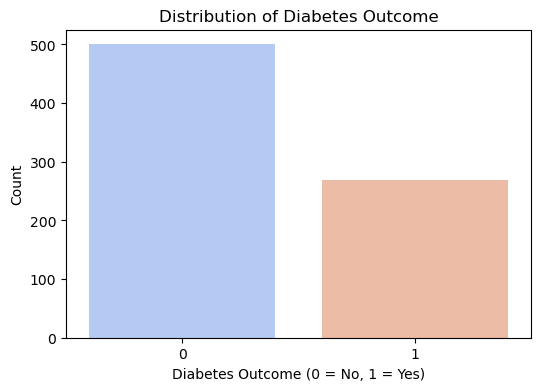

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=diabetes_df["Outcome"], palette="coolwarm")
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


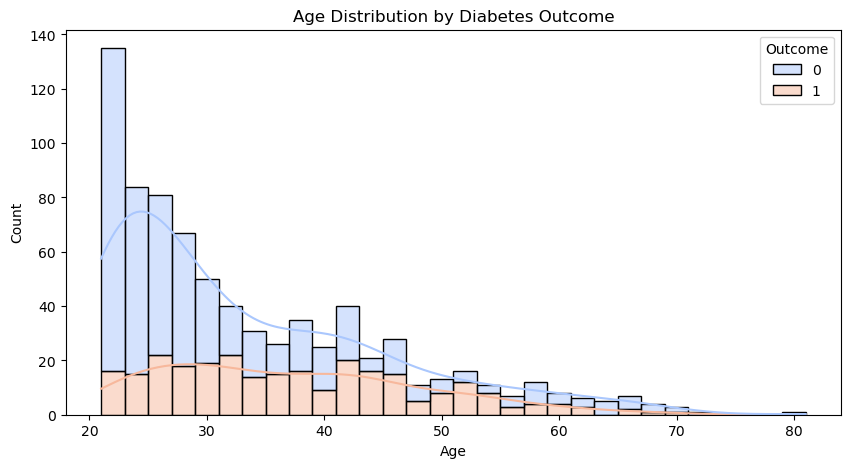

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=diabetes_df, x="Age", hue="Outcome", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14928\2998495118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=diabetes_df, palette="coolwarm")


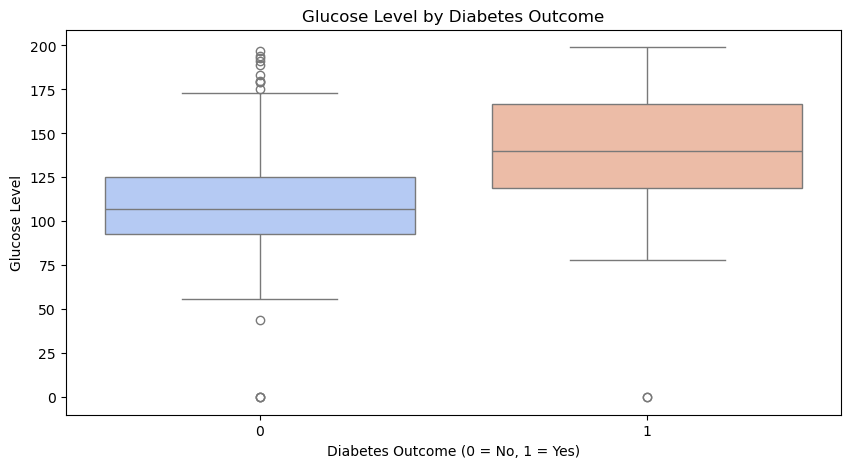

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_df, palette="coolwarm")
plt.title("Glucose Level by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14928\2415687493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="BMI", data=diabetes_df, palette="coolwarm")


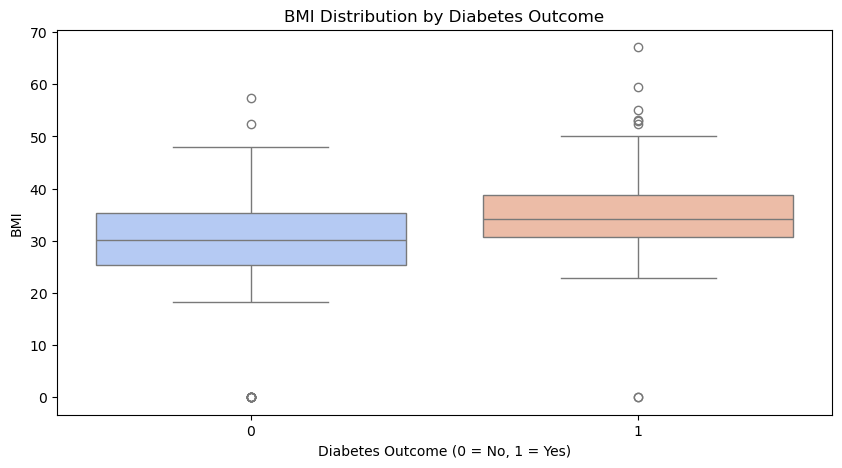

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="BMI", data=diabetes_df, palette="coolwarm")
plt.title("BMI Distribution by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14928\2413802868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="BloodPressure", data=diabetes_df, palette="coolwarm")


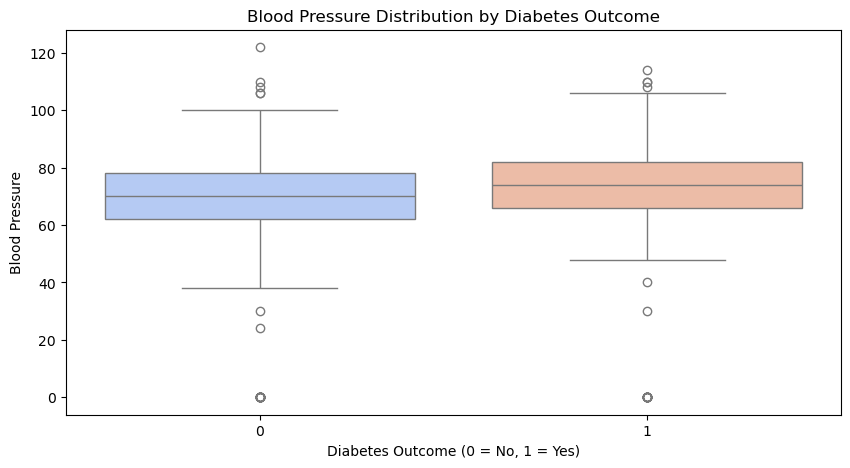

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="BloodPressure", data=diabetes_df, palette="coolwarm")
plt.title("Blood Pressure Distribution by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Blood Pressure")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14928\1968073603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Insulin", data=diabetes_df, palette="coolwarm")


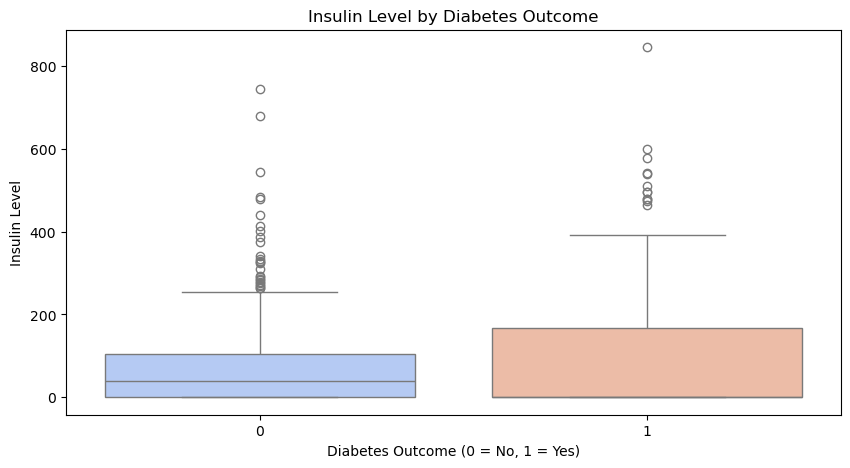

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Insulin", data=diabetes_df, palette="coolwarm")
plt.title("Insulin Level by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Insulin Level")
plt.show()


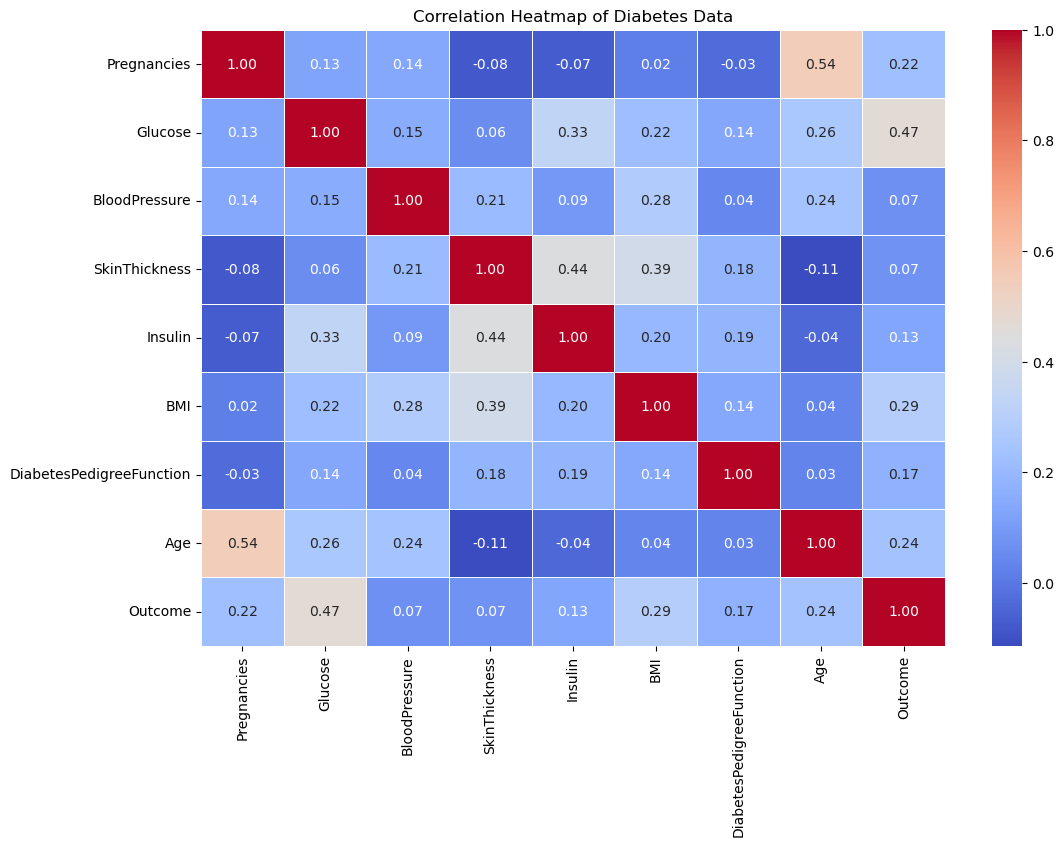

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Data")
plt.show()


Data Preprocessing

In [17]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [18]:
index_list=[]
for feature in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    index_list.extend(outliers(diabetes_df,feature))

In [19]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df
heart_df=remove(diabetes_df,index_list)

In [20]:
# checking the distribution of Outcome Variable
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [21]:
#Splitting the Features and Target
x = diabetes_df.drop(columns='Outcome', axis=1)
y = diabetes_df['Outcome']

In [22]:
#Scalling
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
# print shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (537, 8)
Testing Features Shape: (231, 8)
Training Target Shape: (537,)
Testing Target Shape: (231,)


Modeling

In [25]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB()
}


In [26]:
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f'Accuracy of {name}: {accuracy:.4f}')


Accuracy of Logistic Regression: 0.7359
Accuracy of Decision Tree: 0.7143
Accuracy of Random Forest: 0.7532
Accuracy of SVC: 0.7489
Accuracy of Gradient Boosting: 0.7446
Accuracy of AdaBoost: 0.7532
Accuracy of GaussianNB: 0.7446


C:\Users\hp\AppData\Local\Temp\ipykernel_14928\1901461713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


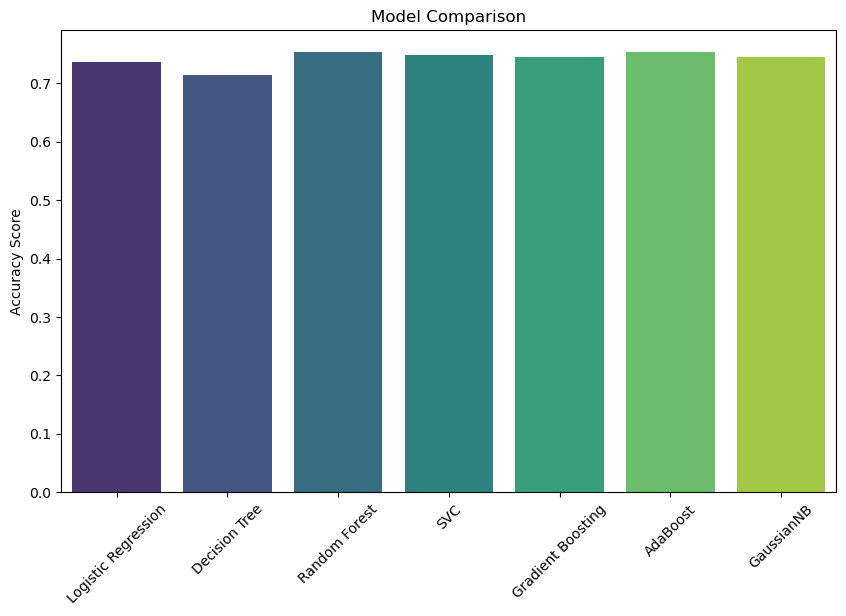

In [27]:
# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

In [28]:
# Choose best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
diabetes_model = models[best_model_name]
diabetes_model.fit(X_train, y_train)
print(f'Best Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.4f}')

Best Model: Random Forest with Accuracy: 0.7532


In [29]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = diabetes_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
